In [19]:
#!pip install scikit-learn-extra

     -------------------------------------- 343.0/343.0 kB 7.1 MB/s eta 0:00:00


In [1]:
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [6]:
import pandas as pd
import numpy as np 
print('Pandas Version :', pd.__version__)
print('Numpy Version :', np.__version__)


Pandas Version : 1.5.3
Numpy Version : 1.23.5


# 전처리된 데이터 불러오기

In [2]:
df=pd.read_csv("전체_데이터_전처리.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   행정동명              66 non-null     object 
 1   음식                66 non-null     int64  
 2   소매                66 non-null     int64  
 3   수리·개인             66 non-null     int64  
 4   과학·기술             66 non-null     int64  
 5   예술·스포츠            66 non-null     int64  
 6   부동산               66 non-null     int64  
 7   교육                66 non-null     int64  
 8   시설관리·임대           66 non-null     int64  
 9   숙박                66 non-null     float64
 10  보건의료              66 non-null     float64
 11  총_직장_인구_수         66 non-null     int64  
 12  총_상주인구_수          66 non-null     int64  
 13  총_유동인구_수          66 non-null     int64  
 14  남성_유동인구_수         66 non-null     int64  
 15  여성_유동인구_수         66 non-null     int64  
 16  연령대_10_유동인구_수     66 non-null     int64  
 17 

In [4]:
df.head()

,행정동명,음식,소매,수리·개인,과학·기술,예술·스포츠,부동산,교육,시설관리·임대,숙박,...,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,버스정류소_수,지하철_역_수
0,신월5동,147,126,76,39,30,23,23,20,4.0,...,1356223,1468581,521297,329550,444740,432030,407559,689628,14,0.0
1,신월7동,152,133,75,31,38,30,17,17,1.0,...,1018163,1078062,345586,207202,281402,319445,336854,605734,20,0.0
2,신정2동,195,137,125,49,49,29,113,12,3.0,...,2058762,2407111,1125267,443093,473516,817879,712202,893917,16,0.0
3,신정6동,69,40,22,43,9,15,104,2,0.0,...,910887,1095510,557559,167025,214747,387479,292690,386897,23,0.0
4,신정3동,165,150,102,49,53,47,55,27,4.0,...,3376001,3921441,1658922,734841,961111,1192100,1084366,1666102,74,1.0


데이터 스케일러
1. StandardScaler	기본 스케일. 평균과 표준편차 사용 -> 표준정규분포로 만듬. 일반적.
2. MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링 -> 이상치에 민감
3. RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화 -> 아웃라이어가 많다면 고려가능

In [5]:
df.columns

Index(['행정동명', '음식', '소매', '수리·개인', '과학·기술', '예술·스포츠', '부동산', '교육', '시설관리·임대',
       '숙박', '보건의료', '총_직장_인구_수', '총_상주인구_수', '총_유동인구_수', '남성_유동인구_수',
       '여성_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수',
       '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '버스정류소_수',
       '지하철_역_수'],
      dtype='object')

In [6]:
df.head()

,행정동명,음식,소매,수리·개인,과학·기술,예술·스포츠,부동산,교육,시설관리·임대,숙박,...,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,버스정류소_수,지하철_역_수
0,신월5동,147,126,76,39,30,23,23,20,4.0,...,1356223,1468581,521297,329550,444740,432030,407559,689628,14,0.0
1,신월7동,152,133,75,31,38,30,17,17,1.0,...,1018163,1078062,345586,207202,281402,319445,336854,605734,20,0.0
2,신정2동,195,137,125,49,49,29,113,12,3.0,...,2058762,2407111,1125267,443093,473516,817879,712202,893917,16,0.0
3,신정6동,69,40,22,43,9,15,104,2,0.0,...,910887,1095510,557559,167025,214747,387479,292690,386897,23,0.0
4,신정3동,165,150,102,49,53,47,55,27,4.0,...,3376001,3921441,1658922,734841,961111,1192100,1084366,1666102,74,1.0


# 변수 간 상관관계 분석하기

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(df.iloc[:, 1:])
#데이터 스케일링
'''
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_robust = scaler.fit_transform(df)

pd.DataFrame(df_robust, columns = df.columns[1:18])
'''
df_std=pd.DataFrame(df_std, columns = df.columns[1:])
df_std['행정동명']=df['행정동명']

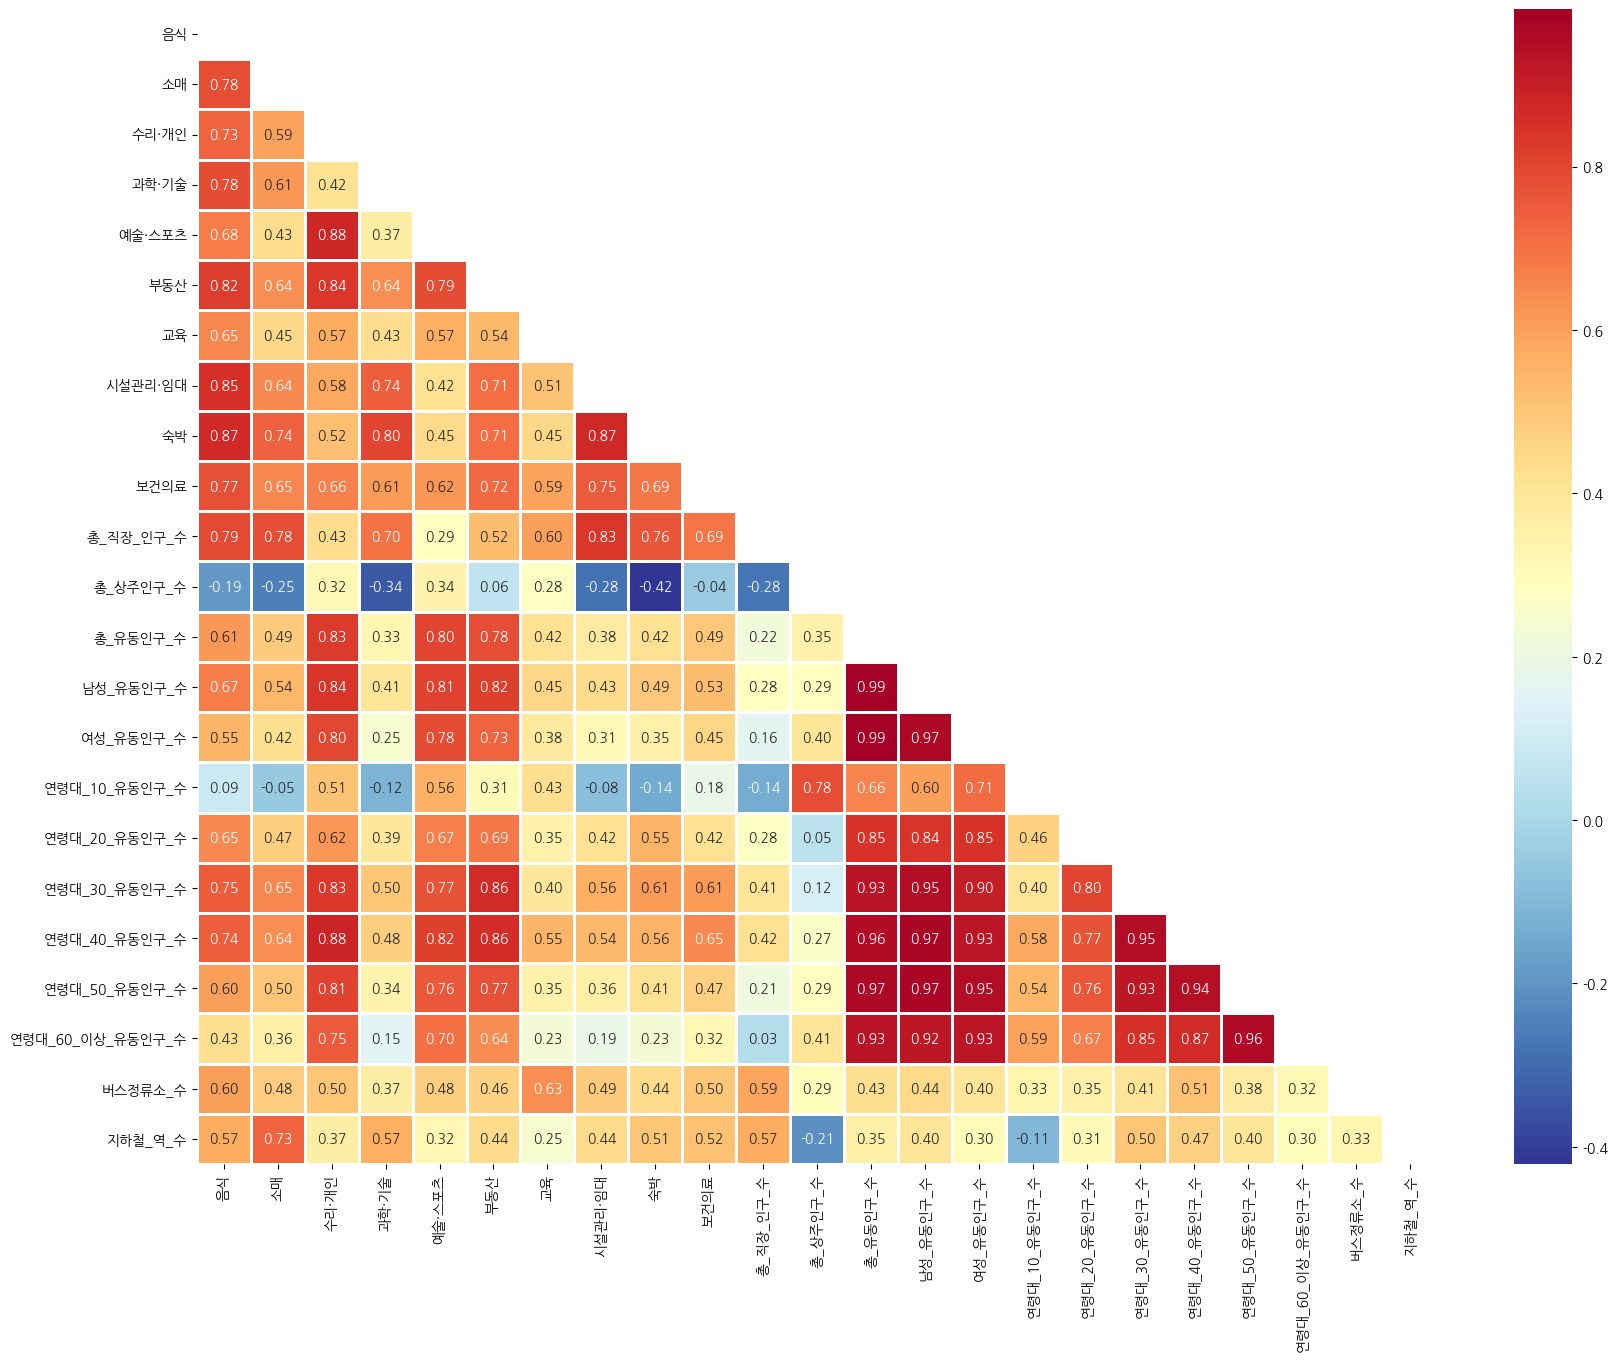

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_std.iloc[:, :23].corr()

plt.figure(figsize = (20, 15))

mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,
           annot = True,
           mask = mask,
           fmt = '.2f',
           linewidths = 1.,
           cmap = 'RdYlBu_r')
plt.show()

In [9]:
df_std.set_index('행정동명', inplace=True)
df.set_index('행정동명', inplace=True)

In [10]:
df_dr=df_std.drop(columns=['남성_유동인구_수', '여성_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수'])
# 총 유동인구수와 높은 상관도를 보이는 칼럼 6개 삭제

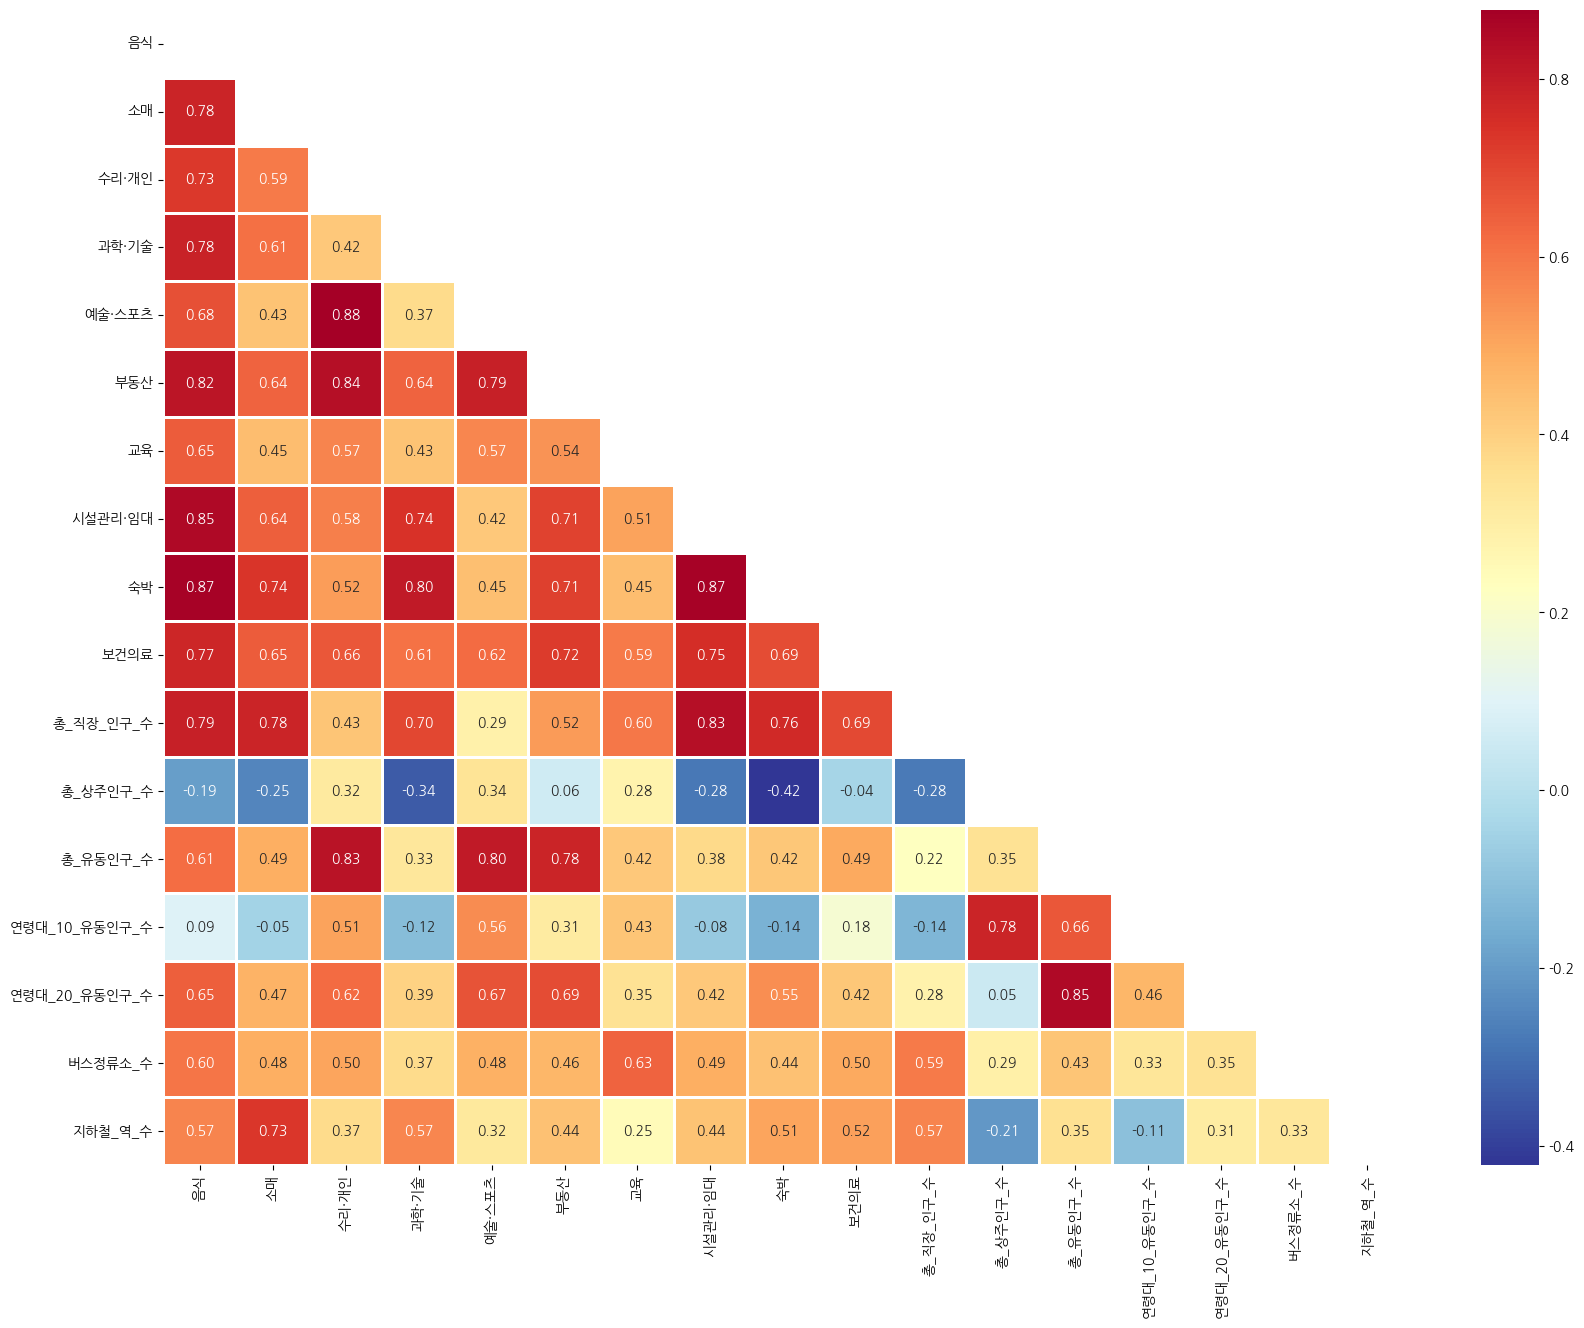

In [11]:
corr = df_dr.iloc[:, :23].corr()

plt.figure(figsize = (20, 15))

mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,
           annot = True,
           mask = mask,
           fmt = '.2f',
           linewidths = 1.,
           cmap = 'RdYlBu_r')
plt.show()

In [12]:
df_dr=df_dr.drop(columns=['숙박', '시설관리·임대', '부동산'])
# 음식 컬럼과 높은 상관도를 보이는 칼럼 3개 삭제

- 최종 변수 14개의 데이터셋 완성

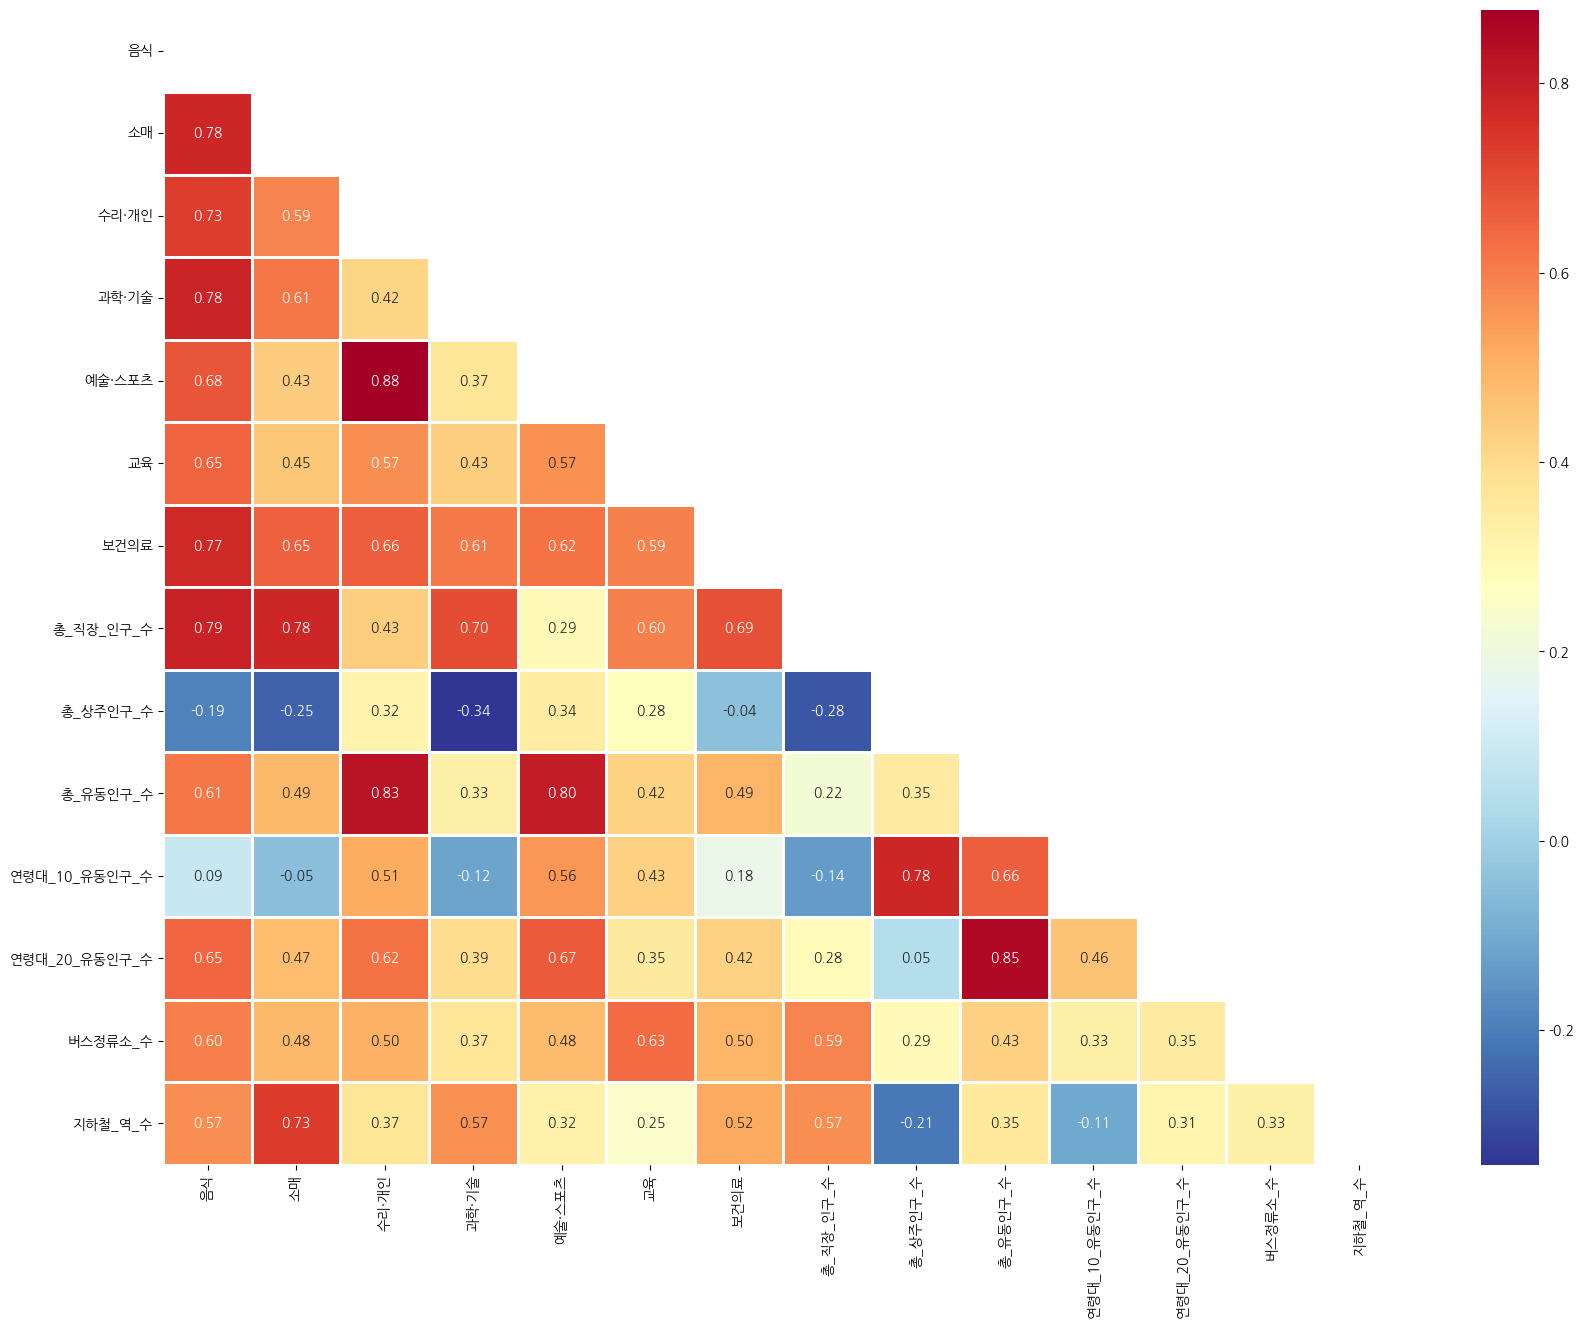

In [13]:
corr = df_dr.iloc[:, :23].corr()

plt.figure(figsize = (20, 15))

mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,
           annot = True,
           mask = mask,
           fmt = '.2f',
           linewidths = 1.,
           cmap = 'RdYlBu_r')
plt.show()

In [14]:
df_dr

,음식,소매,수리·개인,과학·기술,예술·스포츠,교육,보건의료,총_직장_인구_수,총_상주인구_수,총_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,버스정류소_수,지하철_역_수
행정동명,,,,,,,,,,,,,,
신월5동,-0.511767,-0.414530,-0.222292,-0.486227,-0.223850,-0.435373,-0.883638,-0.474926,-0.150251,-0.684013,-0.293156,-0.620240,-0.530046,-0.729947
신월7동,-0.496236,-0.397264,-0.237294,-0.520971,0.058233,-0.548725,-0.883638,-0.362237,0.588670,-0.966906,-0.709995,-0.837296,-0.182532,-0.729947
신정2동,-0.362670,-0.387398,0.512772,-0.442796,0.446096,1.264902,-0.214829,0.138438,0.425032,-0.046819,1.139642,-0.418804,-0.414208,-0.729947
신정6동,-0.754049,-0.626653,-1.032363,-0.468855,-0.964316,1.094874,-0.616115,0.355286,0.867201,-1.001784,-0.207131,-0.908574,-0.008776,-0.729947
신정3동,-0.455856,-0.355333,0.167742,-0.442796,0.587138,0.169169,0.922145,-0.223652,2.763704,1.052624,2.405632,0.098783,2.945088,0.034759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
이화동,0.069089,-0.372599,-0.972358,-0.143124,-0.259110,-0.076427,0.520860,-0.316580,-0.797422,-0.362240,-0.646178,0.346842,-0.124613,0.034759
창신2동,-0.552147,-0.498393,-0.807344,-0.534001,-0.788014,-0.794320,-0.749876,-0.570921,-0.670685,0.443419,-0.473771,0.331382,-1.282991,-0.729947
숭인1동,-0.822385,-0.606921,-0.807344,-0.568745,-1.246399,-0.699861,-0.616115,-0.564889,-1.014087,-0.953312,-1.062932,-0.662857,-0.645883,-0.729947


# k-medoids의 최적의 군집 개수 구하기

- `inertia` : 각 중심점에서 군집의 데이타간의 거리를 합산한 것 (낮을수록 좋음)
- `엘보우 기법` : SSE 값이 감소하는 정도가 급격하게 줄어드는 지점을 최적의 K값으로 선택

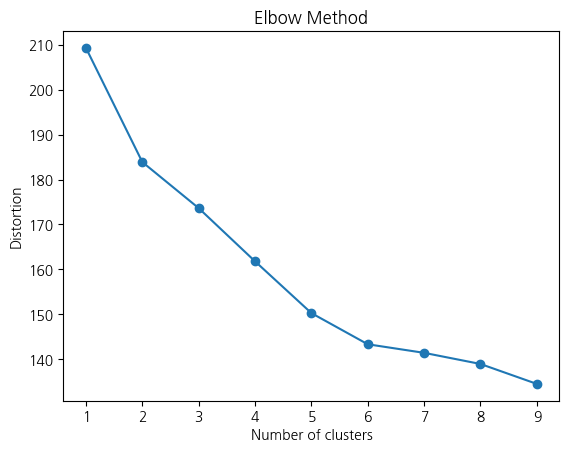

In [15]:
# 엘보우 기법

distortions = []
from sklearn_extra.cluster import KMedoids
for i in range(1, 10):
    kmedoids = KMedoids(n_clusters=i, random_state=100)

    # 필요한 특성 선택
    X = df_dr

    # 모델 학습
    kmedoids.fit(X)
    distortions.append(kmedoids.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

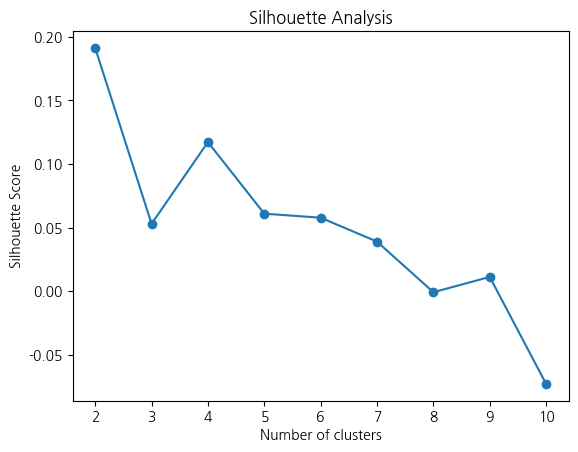

In [16]:
#k-medoids 실루엣 score 계산
from sklearn.metrics import silhouette_score


sil_scores = []
#k값마다의 실루엣 스코어 계산
for i in range(2, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=100)
    kmedoids.fit(df_dr)
    
    sil_scores.append(silhouette_score(df_dr, kmedoids.labels_))

plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [17]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMedoids(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

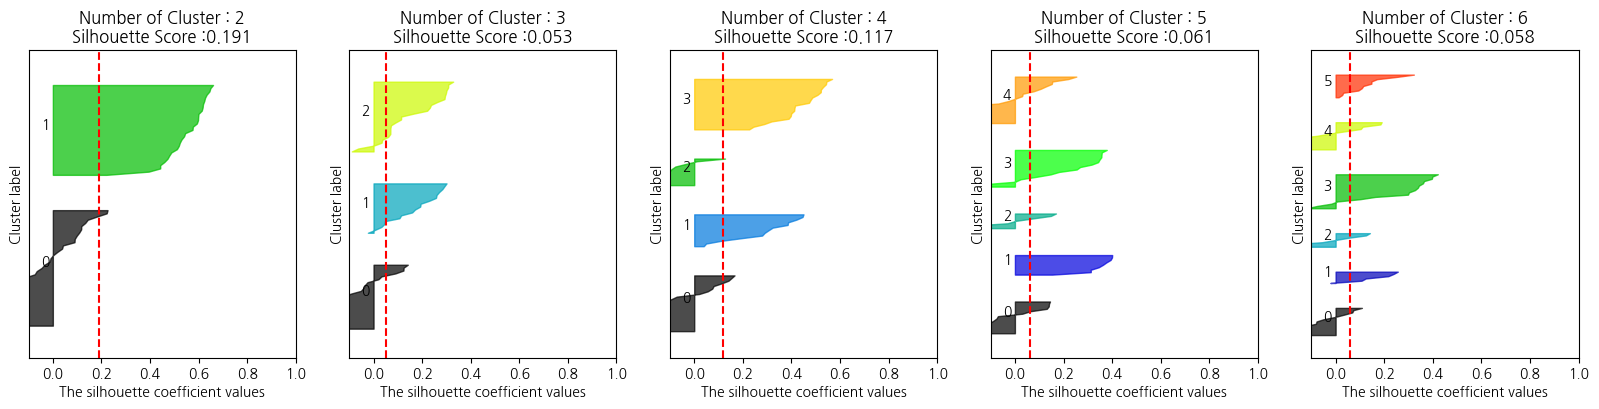

In [18]:
visualize_silhouette([2,3,4,5,6], df_dr)

### 값의 감소폭이 줄어드는 지점인 6을 군집 개수로 결정

In [19]:
# 군집 6개로 k-medoids 모델 진행

kmedoids = KMedoids(n_clusters=6, random_state=100)
kmedoids.fit(df_dr)

# 클러스터 레이블을 DataFrame에 추가
df_dr6=df_dr.copy()
df_dr6['Cluster'] = kmedoids.labels_

In [20]:
df_dr6.head()

,음식,소매,수리·개인,과학·기술,예술·스포츠,교육,보건의료,총_직장_인구_수,총_상주인구_수,총_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,버스정류소_수,지하철_역_수,Cluster
행정동명,,,,,,,,,,,,,,,
신월5동,-0.511767,-0.414530,-0.222292,-0.486227,-0.223850,-0.435373,-0.883638,-0.474926,-0.150251,-0.684013,-0.293156,-0.620240,-0.530046,-0.729947,5
신월7동,-0.496236,-0.397264,-0.237294,-0.520971,0.058233,-0.548725,-0.883638,-0.362237,0.588670,-0.966906,-0.709995,-0.837296,-0.182532,-0.729947,5
신정2동,-0.362670,-0.387398,0.512772,-0.442796,0.446096,1.264902,-0.214829,0.138438,0.425032,-0.046819,1.139642,-0.418804,-0.414208,-0.729947,5
신정6동,-0.754049,-0.626653,-1.032363,-0.468855,-0.964316,1.094874,-0.616115,0.355286,0.867201,-1.001784,-0.207131,-0.908574,-0.008776,-0.729947,5
신정3동,-0.455856,-0.355333,0.167742,-0.442796,0.587138,0.169169,0.922145,-0.223652,2.763704,1.052624,2.405632,0.098783,2.945088,0.034759,4


In [21]:
df_dr6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 신월5동 to 창신3동
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   음식             66 non-null     float64
 1   소매             66 non-null     float64
 2   수리·개인          66 non-null     float64
 3   과학·기술          66 non-null     float64
 4   예술·스포츠         66 non-null     float64
 5   교육             66 non-null     float64
 6   보건의료           66 non-null     float64
 7   총_직장_인구_수      66 non-null     float64
 8   총_상주인구_수       66 non-null     float64
 9   총_유동인구_수       66 non-null     float64
 10  연령대_10_유동인구_수  66 non-null     float64
 11  연령대_20_유동인구_수  66 non-null     float64
 12  버스정류소_수        66 non-null     float64
 13  지하철_역_수        66 non-null     float64
 14  Cluster        66 non-null     int64  
dtypes: float64(14), int64(1)
memory usage: 8.2+ KB


<Axes: xlabel='Cluster', ylabel='count'>

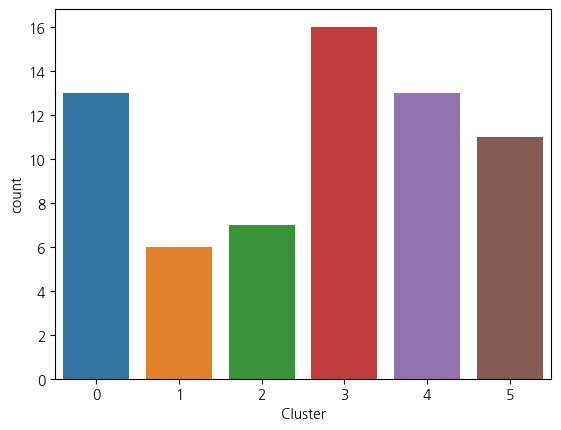

In [22]:
sns.countplot(x = 'Cluster', data = df_dr6)

In [23]:
df_dr6.iloc[:,:14]

,음식,소매,수리·개인,과학·기술,예술·스포츠,교육,보건의료,총_직장_인구_수,총_상주인구_수,총_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,버스정류소_수,지하철_역_수
행정동명,,,,,,,,,,,,,,
신월5동,-0.511767,-0.414530,-0.222292,-0.486227,-0.223850,-0.435373,-0.883638,-0.474926,-0.150251,-0.684013,-0.293156,-0.620240,-0.530046,-0.729947
신월7동,-0.496236,-0.397264,-0.237294,-0.520971,0.058233,-0.548725,-0.883638,-0.362237,0.588670,-0.966906,-0.709995,-0.837296,-0.182532,-0.729947
신정2동,-0.362670,-0.387398,0.512772,-0.442796,0.446096,1.264902,-0.214829,0.138438,0.425032,-0.046819,1.139642,-0.418804,-0.414208,-0.729947
신정6동,-0.754049,-0.626653,-1.032363,-0.468855,-0.964316,1.094874,-0.616115,0.355286,0.867201,-1.001784,-0.207131,-0.908574,-0.008776,-0.729947
신정3동,-0.455856,-0.355333,0.167742,-0.442796,0.587138,0.169169,0.922145,-0.223652,2.763704,1.052624,2.405632,0.098783,2.945088,0.034759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
이화동,0.069089,-0.372599,-0.972358,-0.143124,-0.259110,-0.076427,0.520860,-0.316580,-0.797422,-0.362240,-0.646178,0.346842,-0.124613,0.034759
창신2동,-0.552147,-0.498393,-0.807344,-0.534001,-0.788014,-0.794320,-0.749876,-0.570921,-0.670685,0.443419,-0.473771,0.331382,-1.282991,-0.729947
숭인1동,-0.822385,-0.606921,-0.807344,-0.568745,-1.246399,-0.699861,-0.616115,-0.564889,-1.014087,-0.953312,-1.062932,-0.662857,-0.645883,-0.729947


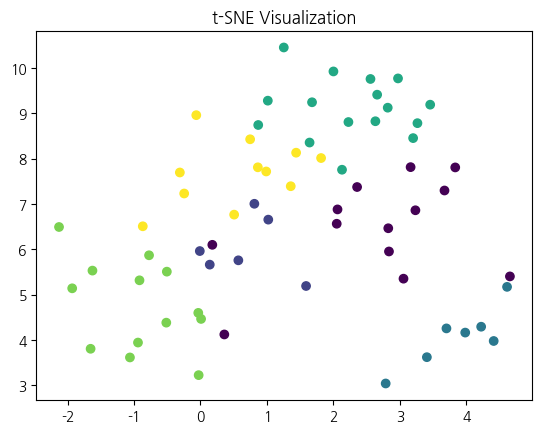

In [24]:
# 13개의 변수들을 2차원으로 축소하여 군집 시각화

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# t-SNE를 사용한 차원 축소
tsne = TSNE(n_components=2, random_state=100)
reduced_data = tsne.fit_transform(df_dr6.iloc[:,:14])
'''
# 또는 PCA를 사용한 차원 축소
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_dr6[:23])
'''
# 시각화
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_dr6['Cluster'], cmap='viridis')
plt.title('t-SNE Visualization')
plt.show()

In [25]:
# 매출 1000이상, 500에서 1000, 200에서 500인 행정동들을 리스트에 담음

sale_1000 = ['종로1.2.3.4가동','명동','을지로동','회현동','광희동','소공동','사직동','종로5.6가동']
sale_500 = ['창신1동','신정4동','목1동','상봉2동','신당동','망우본동','황학동','혜화동','목5동','신내1동','상봉1동', '면목본동']
sale_250 = ['묵1동', '중화2동','면목7동','이화동','목3동','면목3.8동','다산동','필동','신정1동','신정3동','신정2동','삼청동','약수동','신내2동','숭인2동','목2동','신정7동','신월1동','가회동','청운효자동']

In [26]:
indexes_cluster_0 = df_dr6.index[df_dr6['Cluster'] == 0].tolist()
indexes_cluster_1 = df_dr6.index[df_dr6['Cluster'] == 1].tolist()
indexes_cluster_2 = df_dr6.index[df_dr6['Cluster'] == 2].tolist()
indexes_cluster_3 = df_dr6.index[df_dr6['Cluster'] == 3].tolist()
indexes_cluster_4 = df_dr6.index[df_dr6['Cluster'] == 4].tolist()
indexes_cluster_5 = df_dr6.index[df_dr6['Cluster'] == 5].tolist()

## 매출 1000, 500, 250 분류
- 군집별로 행정동 중 매출 1000선, 500선, 250선이 각각 몇개 포함되어 있는지 확인

In [27]:
from collections import Counter
counter_0 = Counter(indexes_cluster_0)
counter_1 = Counter(indexes_cluster_1)
counter_2 = Counter(indexes_cluster_2)
counter_3 = Counter(indexes_cluster_3)
counter_4 = Counter(indexes_cluster_4)
counter_5 = Counter(indexes_cluster_5)
# 리스트 A의 각 원소가 리스트 B에 몇 번 등장하는지 확인
total_count_best_in_0 = sum(counter_0[element] for element in sale_1000)
total_count_best_in_1 = sum(counter_1[element] for element in sale_1000)
total_count_best_in_2 = sum(counter_2[element] for element in sale_1000)
total_count_best_in_3 = sum(counter_3[element] for element in sale_1000)
total_count_best_in_4 = sum(counter_4[element] for element in sale_1000)
total_count_best_in_5 = sum(counter_5[element] for element in sale_1000)
# 결과 출력
print("Cluster 0에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_0, "/", len(indexes_cluster_0))
print("Cluster 1에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_1, "/", len(indexes_cluster_1))
print("Cluster 2에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_2, "/", len(indexes_cluster_2))
print("Cluster 3에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_3, "/", len(indexes_cluster_3))
print("Cluster 4에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_4, "/", len(indexes_cluster_4))
print("Cluster 5에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_5, "/", len(indexes_cluster_5))

Cluster 0에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수: 1 / 13
Cluster 1에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수: 0 / 6
Cluster 2에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수: 7 / 7
Cluster 3에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수: 0 / 16
Cluster 4에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수: 0 / 13
Cluster 5에 매출 1000이상 (2023.2/4분기)의 원소가 포함된 횟수: 0 / 11


In [28]:
from collections import Counter
counter_0 = Counter(indexes_cluster_0)
counter_1 = Counter(indexes_cluster_1)
counter_2 = Counter(indexes_cluster_2)
counter_3 = Counter(indexes_cluster_3)
counter_4 = Counter(indexes_cluster_4)
counter_5 = Counter(indexes_cluster_5)
# 리스트 A의 각 원소가 리스트 B에 몇 번 등장하는지 확인
total_count_best_in_0 = sum(counter_0[element] for element in sale_500)
total_count_best_in_1 = sum(counter_1[element] for element in sale_500)
total_count_best_in_2 = sum(counter_2[element] for element in sale_500)
total_count_best_in_3 = sum(counter_3[element] for element in sale_500)
total_count_best_in_4 = sum(counter_4[element] for element in sale_500)
total_count_best_in_5 = sum(counter_5[element] for element in sale_500)
# 결과 출력
print("Cluster 0에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_0, "/", len(indexes_cluster_0))
print("Cluster 1에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_1, "/", len(indexes_cluster_1))
print("Cluster 2에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_2, "/", len(indexes_cluster_2))
print("Cluster 3에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_3, "/", len(indexes_cluster_3))
print("Cluster 4에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_4, "/", len(indexes_cluster_4))
print("Cluster 5에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_5, "/", len(indexes_cluster_5))

Cluster 0에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수: 4 / 13
Cluster 1에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수: 1 / 6
Cluster 2에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수: 0 / 7
Cluster 3에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수: 0 / 16
Cluster 4에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수: 7 / 13
Cluster 5에 매출 500이상 1000미만 (2023.2/4분기)의 원소가 포함된 횟수: 0 / 11


In [29]:
from collections import Counter
counter_0 = Counter(indexes_cluster_0)
counter_1 = Counter(indexes_cluster_1)
counter_2 = Counter(indexes_cluster_2)
counter_3 = Counter(indexes_cluster_3)
counter_4 = Counter(indexes_cluster_4)
counter_5 = Counter(indexes_cluster_5)
# 리스트 A의 각 원소가 리스트 B에 몇 번 등장하는지 확인
total_count_best_in_0 = sum(counter_0[element] for element in sale_250)
total_count_best_in_1 = sum(counter_1[element] for element in sale_250)
total_count_best_in_2 = sum(counter_2[element] for element in sale_250)
total_count_best_in_3 = sum(counter_3[element] for element in sale_250)
total_count_best_in_4 = sum(counter_4[element] for element in sale_250)
total_count_best_in_5 = sum(counter_5[element] for element in sale_250)
# 결과 출력
print("Cluster 0에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_0, "/", len(indexes_cluster_0))
print("Cluster 1에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_1, "/", len(indexes_cluster_1))
print("Cluster 2에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_2, "/", len(indexes_cluster_2))
print("Cluster 3에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_3, "/", len(indexes_cluster_3))
print("Cluster 4에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_4, "/", len(indexes_cluster_4))
print("Cluster 5에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수:", total_count_best_in_5, "/", len(indexes_cluster_5))

Cluster 0에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수: 6 / 13
Cluster 1에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수: 1 / 6
Cluster 2에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수: 0 / 7
Cluster 3에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수: 4 / 16
Cluster 4에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수: 5 / 13
Cluster 5에 매출 250이상 500미만 (2023.2/4분기)의 원소가 포함된 횟수: 4 / 11


## 군집별로 변수 값 출력

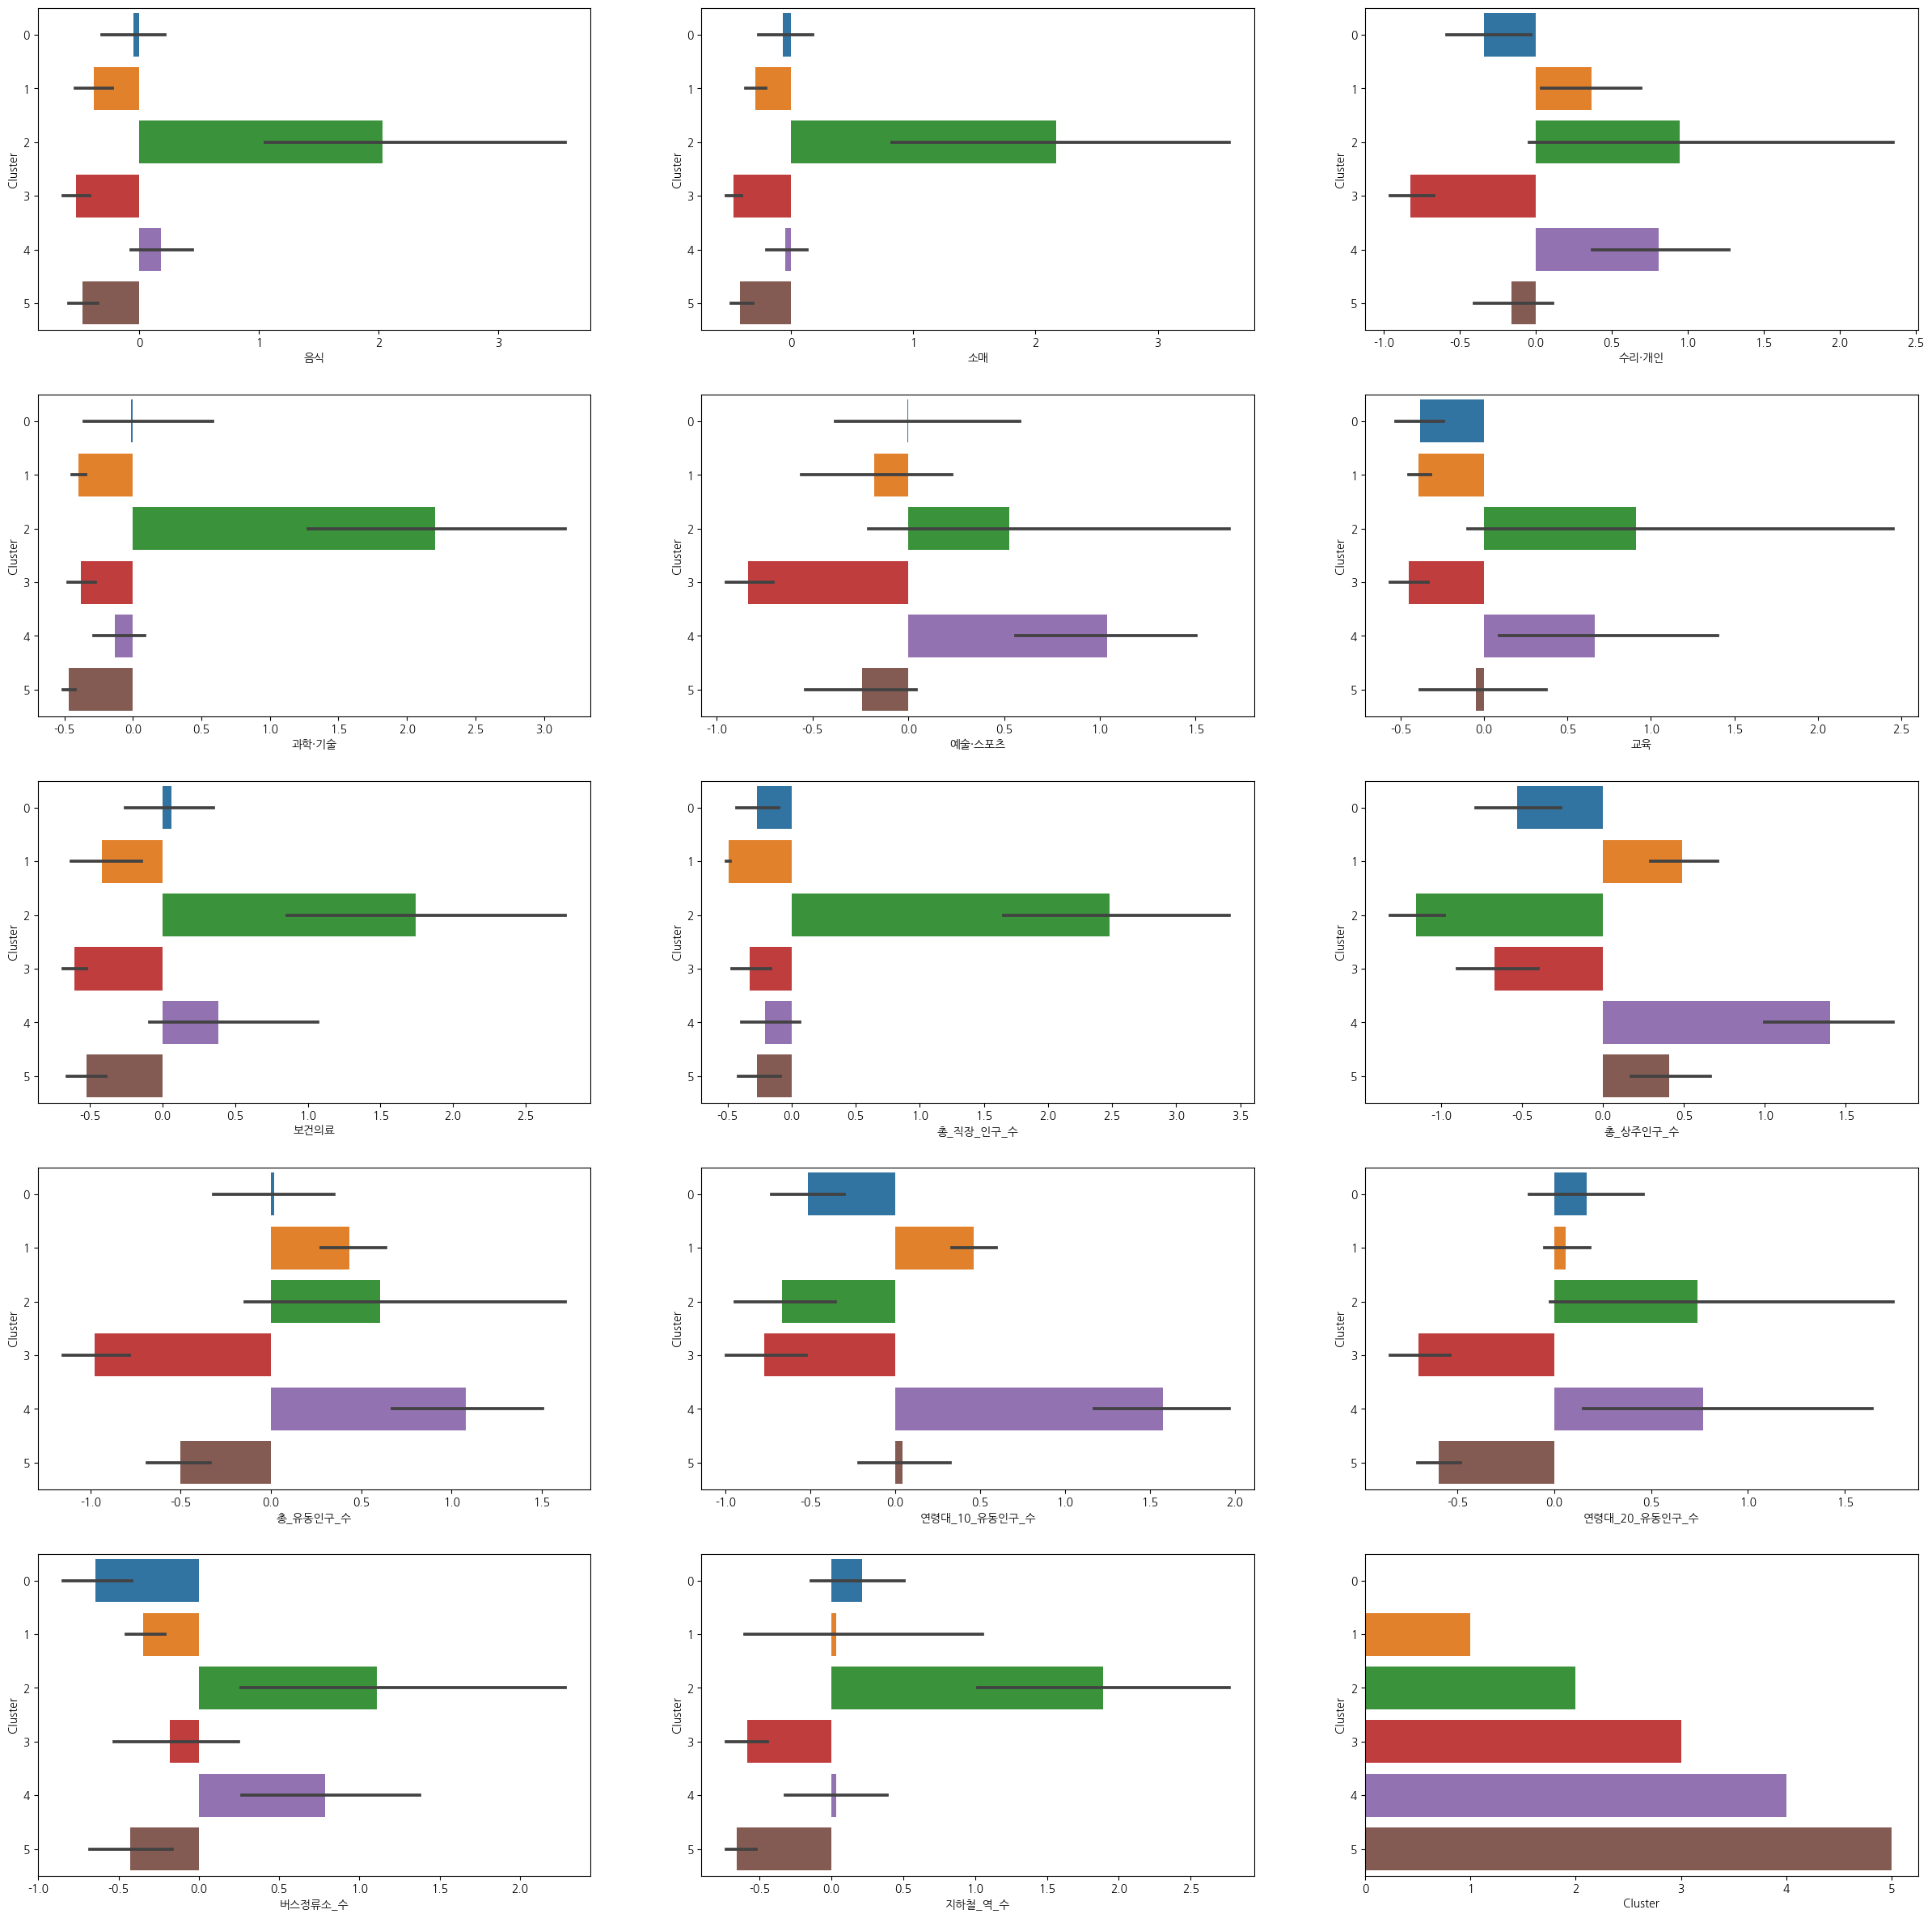

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(nrows=5, ncols=3)

figure.set_size_inches(30, 30)

for i, column in enumerate(df_dr6.columns):
    sns.barplot(data=df_dr6, y='Cluster', x=column, orient='h', ax=locals()[f'ax{i + 1}'])

plt.show()

# 군집별 행정구, 폐업률 비교

In [59]:
close_rate = pd.read_csv("행정동_폐업률.csv")

In [60]:
close_rate

,행정구,행정동,폐업률,순위,매출액
0,중랑구,상봉2동,3.2,1.0,793.0
1,중랑구,망우본동,3.1,2.0,635.0
2,중랑구,신내1동,1.9,3.0,584.0
3,중랑구,상봉1동,3.1,4.0,571.0
4,중랑구,면목본동,2.9,5.0,544.0
...,...,...,...,...,...
61,중구,장충동,1.1,NaN,NaN
62,중구,청구동,3.2,NaN,NaN
63,중구,신당5동,2.6,NaN,NaN
64,중구,동화동,1.7,NaN,NaN


In [61]:
df_reset = df_dr6.reset_index()

In [62]:
df_close = pd.merge(df_reset, close_rate, left_on = "행정동명", right_on = "행정동")

In [63]:
df_close

,행정동명,음식,소매,수리·개인,과학·기술,예술·스포츠,교육,보건의료,총_직장_인구_수,총_상주인구_수,...,연령대_10_유동인구_수,연령대_20_유동인구_수,버스정류소_수,지하철_역_수,Cluster,행정구,행정동,폐업률,순위,매출액
0,신월5동,-0.511767,-0.414530,-0.222292,-0.486227,-0.223850,-0.435373,-0.883638,-0.474926,-0.150251,...,-0.293156,-0.620240,-0.530046,-0.729947,5,양천구,신월5동,3.5,NaN,NaN
1,신월7동,-0.496236,-0.397264,-0.237294,-0.520971,0.058233,-0.548725,-0.883638,-0.362237,0.588670,...,-0.709995,-0.837296,-0.182532,-0.729947,5,양천구,신월7동,2.0,NaN,NaN
2,신정2동,-0.362670,-0.387398,0.512772,-0.442796,0.446096,1.264902,-0.214829,0.138438,0.425032,...,1.139642,-0.418804,-0.414208,-0.729947,5,양천구,신정2동,2.6,7.0,367.0
3,신정6동,-0.754049,-0.626653,-1.032363,-0.468855,-0.964316,1.094874,-0.616115,0.355286,0.867201,...,-0.207131,-0.908574,-0.008776,-0.729947,5,양천구,신정6동,3.2,NaN,NaN
4,신정3동,-0.455856,-0.355333,0.167742,-0.442796,0.587138,0.169169,0.922145,-0.223652,2.763704,...,2.405632,0.098783,2.945088,0.034759,4,양천구,신정3동,2.9,6.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,이화동,0.069089,-0.372599,-0.972358,-0.143124,-0.259110,-0.076427,0.520860,-0.316580,-0.797422,...,-0.646178,0.346842,-0.124613,0.034759,0,종로구,이화동,2.8,6.0,408.0
62,창신2동,-0.552147,-0.498393,-0.807344,-0.534001,-0.788014,-0.794320,-0.749876,-0.570921,-0.670685,...,-0.473771,0.331382,-1.282991,-0.729947,0,종로구,창신2동,6.2,NaN,NaN
63,숭인1동,-0.822385,-0.606921,-0.807344,-0.568745,-1.246399,-0.699861,-0.616115,-0.564889,-1.014087,...,-1.062932,-0.662857,-0.645883,-0.729947,3,종로구,숭인1동,3.4,NaN,NaN
64,청운효자동,-0.070689,-0.251738,-0.672332,0.065344,-0.964316,-0.133102,-0.482353,-0.036133,-0.358352,...,0.263523,-0.335700,0.744170,-0.729947,3,종로구,청운효자동,1.1,10.0,267.0


In [64]:
df_close = df_close.set_index("행정동명")

In [70]:
df_close = df_close[["Cluster","행정구", "폐업률", "순위", "매출액"]]

In [83]:
sns.countplot(df_close, "Cluster")
df_close.query("Cluster == 0").행정구.value_counts()

군집 0의 행정구 수


중구     6
종로구    5
양천구    1
중랑구    1
Name: 행정구, dtype: int64

In [84]:
print("군집 1의 행정구 수")
df_close.query("Cluster == 1").행정구.value_counts()

군집 1의 행정구 수


중랑구    6
Name: 행정구, dtype: int64

In [85]:
print("군집 2의 행정구 수")
df_close.query("Cluster == 2").행정구.value_counts()

군집 2의 행정구 수


중구     5
종로구    2
Name: 행정구, dtype: int64

In [91]:
print("군집 3의 행정구 수")
df_close.query("Cluster == 3").행정구.value_counts()

군집 3의 행정구 수


종로구    9
중구     3
양천구    2
중랑구    2
Name: 행정구, dtype: int64

In [92]:
print("군집 4의 행정구 수")
df_close.query("Cluster == 4").행정구.value_counts()

군집 4의 행정구 수


양천구    6
중랑구    6
종로구    1
Name: 행정구, dtype: int64

In [93]:
print("군집 5의 행정구 수")
df_close.query("Cluster == 5").행정구.value_counts()

군집 5의 행정구 수


양천구    9
중랑구    1
중구     1
Name: 행정구, dtype: int64

In [100]:
for i in range(6):
    print(f"군집 {i}의 폐업률 요약")
    print(df_close.query(f"Cluster == {i}").폐업률.describe())
    print("\n")

군집 0의 폐업률 요약
count    13.000000
mean      2.630769
std       1.149916
min       1.700000
25%       2.100000
50%       2.200000
75%       2.800000
max       6.200000
Name: 폐업률, dtype: float64


군집 1의 폐업률 요약
count    6.000000
mean     3.500000
std      0.509902
min      3.000000
25%      3.100000
50%      3.350000
75%      3.975000
max      4.100000
Name: 폐업률, dtype: float64


군집 2의 폐업률 요약
count    7.000000
mean     1.771429
std      0.269037
min      1.500000
25%      1.600000
50%      1.700000
75%      1.850000
max      2.300000
Name: 폐업률, dtype: float64


군집 3의 폐업률 요약
count    16.000000
mean      2.675000
std       0.919783
min       1.100000
25%       2.375000
50%       2.700000
75%       3.075000
max       4.800000
Name: 폐업률, dtype: float64


군집 4의 폐업률 요약
count    13.000000
mean      3.161538
std       0.712435
min       1.900000
25%       2.900000
50%       3.100000
75%       3.500000
max       4.200000
Name: 폐업률, dtype: float64


군집 5의 폐업률 요약
count    11.000000
mean      2.936364
